# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import gmaps
from api_keys import g_key
from api_keys import weather_api_key
import pandas as pd
from citipy import citipy
import requests
import numpy as np
import json

#import os
#output_data_file = "output_data/cities.csv"

#gmaps.configure(api_key=g_key)

## Generate Cities List

In [2]:
#Latitude (-90,90) / Longitude (-180,180), 1400 random points

rnd_lng = np.random.uniform(-180,180,1400)
rnd_lat = np.random.uniform(-90,90,1400)

random_points_df = pd.DataFrame({"Latitude":rnd_lat,
                          "Longitude":rnd_lng})
random_points_df


,Latitude,Longitude
0,44.297149,-70.995373
1,41.630067,122.531440
2,6.402534,-88.294365
3,-17.854870,-103.980021
4,22.830352,-120.101012
...,...,...
1395,-11.556778,-120.484540
1396,-85.176484,-27.841592
1397,-16.741025,41.879498
1398,-4.991837,-143.876357


In [3]:
city = []

#Find nearest city
for i in range(0,len(random_points_df['Latitude'])):
    city_current = citipy.nearest_city(random_points_df.iloc[i]['Latitude'],random_points_df.iloc[i]['Longitude']).city_name
    city.append(city_current)
   
random_points_df['City'] = city
random_points_df

,Latitude,Longitude,City
0,44.297149,-70.995373,berlin
1,41.630067,122.531440,liaozhong
2,6.402534,-88.294365,nicoya
3,-17.854870,-103.980021,puerto ayora
4,22.830352,-120.101012,guerrero negro
...,...,...,...
1395,-11.556778,-120.484540,rikitea
1396,-85.176484,-27.841592,ushuaia
1397,-16.741025,41.879498,angoche
1398,-4.991837,-143.876357,atuona


In [4]:
random_points_df.groupby("City").count()

,Latitude,Longitude
City,,
abaza,1,1
aberdeen,1,1
acajutla,1,1
acarau,1,1
adrar,1,1
...,...,...
zambezi,1,1
zapolyarnyy,1,1
zhangjiakou,1,1


In [5]:
cities_df = random_points_df.drop_duplicates("City", keep="first")
cities_df
total_cities =len(cities_df)
total_cities
#Had to go back and add more cities to start with - first total after dropping duplicates was 328 cities (need 500+)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
dates = []

units = "imperial"

url = "http://api.openweathermap.org/data/2.5/weather?"
#city = (cities_df["City"])
#city_count = 1
query_url = f"{url}appid={weather_api_key}&units={units}&q="

    
for index, row in cities_df.iterrows():
    currentcity = row["City"]
    response = requests.get(query_url + currentcity).json()

    # if city is in the city list of wrapper then get the data otherwise print the message of missing city.
    try:
        temperature.append(response["main"]["temp_max"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        cloudiness.append(response["clouds"]["all"])
        dates.append(response["dt"])
        print(f"Processing record : {currentcity}")
    
             # Some of the cities we generate don't have data in openweathermap, so set their values to numpy's NaN    
    except KeyError:
        temperature.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        cloudiness.append(np.nan)
        dates.append(np.nan)
        print("City not found. Skipping..")    
    
    
#update latitude and longitude to actually match the city
# cities_df["Latitude"] = latitude
# cities_df["Longitude"] = longitude

# Assemble everything into a data frame
# weather_df = pd.DataFrame({"City": cities.df["City"],
#                            "Latitude": latitude,
#                            "Longitude": longitude,
#                            "Humidity": humidity,
#                            "Max Temp": temperature,
#                            "Cloudiness": cloudiness,
#                            "Wind Speed": wind_speed,
#                            "Date": dates,
#                           })
#update latitude and longitude to actually match the city
cities_df["Latitude"] = latitude
cities_df["Longitude"] = longitude

#add new information into the cities_df
cities_df["Temp"] = temperature
cities_df["Humidity"] = humidity
cities_df["Wind Speed"] = wind_speed
cities_df["Cloudiness"] = cloudiness
cities_df["Date"] = dates

Processing record : berlin
Processing record : liaozhong
Processing record : nicoya
Processing record : puerto ayora
Processing record : guerrero negro
Processing record : los llanos de aridane
Processing record : la rioja
Processing record : esperance
Processing record : verkhoyansk
Processing record : putyatino
Processing record : tuktoyaktuk
Processing record : jamestown
Processing record : salta
Processing record : akyab
Processing record : busselton
Processing record : kodiak
Processing record : leningradskiy
Processing record : yellowknife
Processing record : marataizes
Processing record : georgetown
Processing record : coquimbo
Processing record : ust-uda
Processing record : mataura
City not found. Skipping..
Processing record : vaini
Processing record : berlevag
Processing record : madimba
Processing record : gao
Processing record : omis
Processing record : muravlenko
City not found. Skipping..
Processing record : rikitea
Processing record : qaanaaq
Processing record : albany
P

Processing record : salmas
Processing record : wanaka
Processing record : san patricio
Processing record : remedios
Processing record : santo anastacio
Processing record : rio grande
Processing record : ryotsu
Processing record : baherden
Processing record : galle
Processing record : peniche
Processing record : mitu
Processing record : terney
Processing record : werda
Processing record : ust-nera
Processing record : dudinka
City not found. Skipping..
City not found. Skipping..
Processing record : nordby
Processing record : arco
Processing record : daryapur
Processing record : seoul
Processing record : souillac
Processing record : camopi
Processing record : manggar
Processing record : biltine
Processing record : vestmannaeyjar
Processing record : abaza
Processing record : cartagena
Processing record : pacifica
Processing record : san vicente
Processing record : nelson bay
Processing record : provideniya
Processing record : hualmay
Processing record : shizuishan
Processing record : nuuk


Processing record : viedma
Processing record : buala
Processing record : avera
Processing record : mehamn
Processing record : juneau
Processing record : marawi
Processing record : mercedes
Processing record : ndele
Processing record : louga
Processing record : zapolyarnyy
Processing record : vila franca do campo
Processing record : nuevo progreso
Processing record : bouca
Processing record : altagracia de orituco
Processing record : phonhong
Processing record : takestan
Processing record : aripuana
Processing record : kysyl-syr
Processing record : diamantino
Processing record : zhuhai
Processing record : khani
City not found. Skipping..
Processing record : kahului
Processing record : acajutla
City not found. Skipping..
Processing record : wajir
Processing record : micheweni
Processing record : miles city
Processing record : el colorado
Processing record : lagoa
Processing record : hasaki
Processing record : mucurapo
Processing record : poronaysk
City not found. Skipping..
Processing re

<ipython-input-9-19a958c17082>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities_df["Latitude"] = latitude
<ipython-input-9-19a958c17082>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cities_df["Longitude"] = longitude
<ipython-input-9-19a958c17082>:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [105]:
cities_df.head()
#len(cities_df)
import os
import csv
output_data_file = "output_data/cities.csv"
cities_df.to_csv(output_data_file)


In [80]:
#check for missing data
cities_df.count()

Latitude      561
Longitude     561
City          561
Temp          561
Humidity      561
Wind Speed    561
Cloudiness    561
Date          561
dtype: int64

In [25]:
#Remove rows missing data
clean_df = cities_df.dropna(how="any")
clean_df.count()

Latitude      561
Longitude     561
City          561
Temp          561
Humidity      561
Wind Speed    561
Cloudiness    561
Date          561
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
high_humidity = clean_df.loc[clean_df["Humidity"]>100]
high_humidity.count()
#No cities with 100% humidity!

Latitude      0
Longitude     0
City          0
Temp          0
Humidity      0
Wind Speed    0
Cloudiness    0
Date          0
dtype: int64

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [31]:
clean_df



,Latitude,Longitude,City,Temp,Humidity,Wind Speed,Cloudiness,Date
0,52.52,13.41,berlin,57.20,93.0,13.87,75.0,1.604077e+09
1,41.51,122.72,liaozhong,41.00,48.0,4.47,0.0,1.604077e+09
2,10.15,-85.45,nicoya,84.20,79.0,6.93,40.0,1.604077e+09
3,-0.74,-90.35,puerto ayora,78.80,69.0,19.46,40.0,1.604077e+09
4,27.98,-114.06,guerrero negro,74.86,37.0,2.28,24.0,1.604077e+09
...,...,...,...,...,...,...,...,...
1375,-14.25,129.55,port keats,82.42,78.0,9.86,1.0,1.604077e+09
1390,12.77,120.78,batasan,81.61,71.0,2.15,100.0,1.604077e+09
1392,12.25,109.18,nha trang,82.40,83.0,8.05,40.0,1.604077e+09
1397,-16.23,39.91,angoche,79.84,74.0,9.98,0.0,1.604077e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

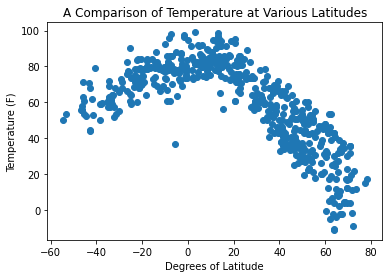

In [35]:
lat = clean_df["Latitude"]
temp = clean_df["Temp"]
plt.scatter(lat,temp)
plt.xlabel("Degrees of Latitude")
plt.ylabel("Temperature (F)")
plt.title("A Comparison of Temperature at Various Degrees of Latitude")
plt.show()

In [34]:
import scipy.stats as st
print(f"The correlation coefficient between latitude and temperature is {round(st.pearsonr(lat,temp)[0],2)}")

The correlation coefficient between latitude and temperature is -0.66


In [ ]:
#This plot shows that temperatures decrease at greater distance from the equator. Temperatures are lower north of the equator.

## Latitude vs. Humidity Plot

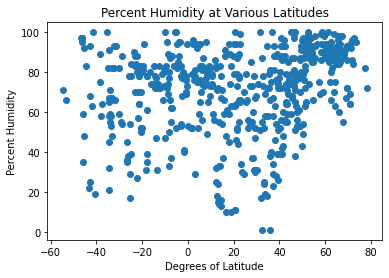

In [39]:
lat = clean_df["Latitude"]
humidity = clean_df["Humidity"]
plt.scatter(lat,humidity)
plt.xlabel("Degrees of Latitude")
plt.ylabel("Percent Humidity")
plt.title("Percent Humidity at Various Degrees of Latitude")
plt.show()

In [37]:
print(f"The correlation coefficient between latitude and humidity is {round(st.pearsonr(lat,humidity)[0],2)}")

The correlation coefficient between latitude and humidity is 0.24


In [ ]:
#Latitudinal position does not have a big effect on percent humidity. However between 60 and 80 degrees of latitude, there seems to be a pocket of higher humidity.

## Latitude vs. Cloudiness Plot

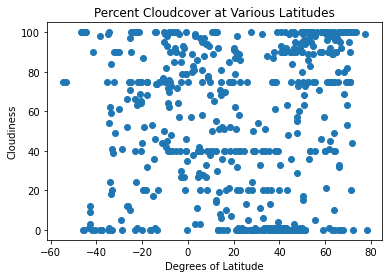

In [41]:
lat = clean_df["Latitude"]
cloud = clean_df["Cloudiness"]
plt.scatter(lat,cloud)
plt.xlabel("Degrees of Latitude")
plt.ylabel("Cloudiness")
plt.title("Percent Cloudcover at Various Degrees of Latitude")
plt.show()

In [45]:
print(f"The correlation coefficient between latitude and humidity is {round(st.pearsonr(lat,cloud)[0],2)}")

The correlation coefficient between latitude and humidity is 0.08


In [ ]:
#The percent cloudiness seems pretty evenly dispersed. There also seems to be a cluster around 50 to 80 degrees, but not sure if I just have a bunch of cities in that area.

## Latitude vs. Wind Speed Plot

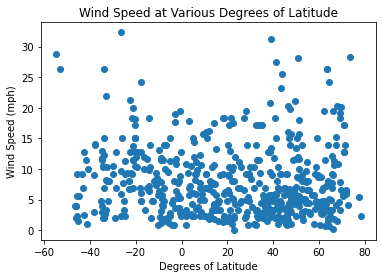

In [49]:
lat = clean_df["Latitude"]
wind = clean_df["Wind Speed"]
plt.scatter(lat,wind)
plt.xlabel("Degrees of Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Wind Speed at Various Degrees of Latitude")
plt.show()

In [47]:
print(f"The correlation coefficient between latitude and wind speed is {round(st.pearsonr(lat,wind)[0],2)}")

The correlation coefficient between latitude and wind speed is -0.06


In [ ]:
#Wind speed does not seem to be affected by the latitudinal position of the city.

## Linear Regression

In [51]:
from scipy.stats import linregress

The r-squared is: 0.7841229507564348


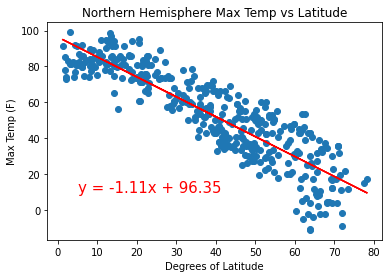

In [62]:
north = clean_df.loc[clean_df["Latitude"]>=0]

x_values = north["Latitude"]
y_values = north["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,10),fontsize=15,color="red")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere Max Temp vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4609922679264991


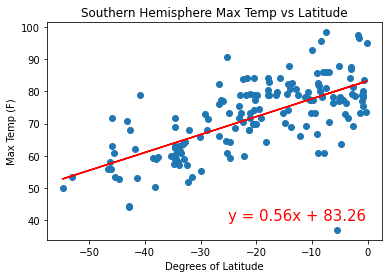

In [64]:
south = clean_df.loc[clean_df["Latitude"]<0]

x_values = south["Latitude"]
y_values = south["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere Max Temp vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14053809559774139


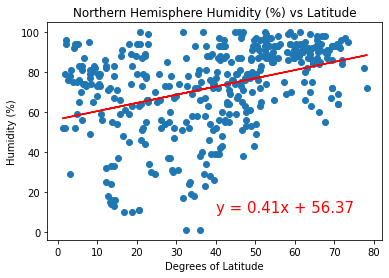

In [67]:
north = clean_df.loc[clean_df["Latitude"]>=0]

x_values = north["Latitude"]
y_values = north["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere Humidity (%) vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.014638140492941366


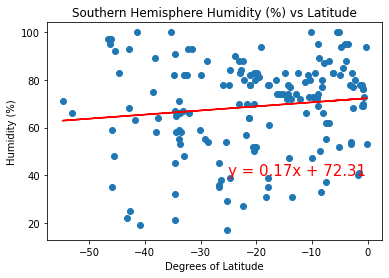

In [68]:
x_values = south["Latitude"]
y_values = south["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere Humidity (%) vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0557175068029524


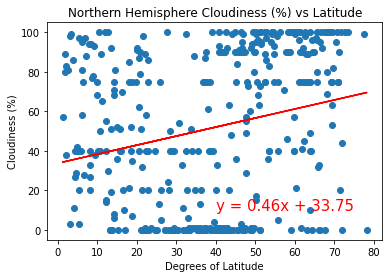

In [74]:
x_values = north["Latitude"]
y_values = north["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere Cloudiness (%) vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.039043491878373034


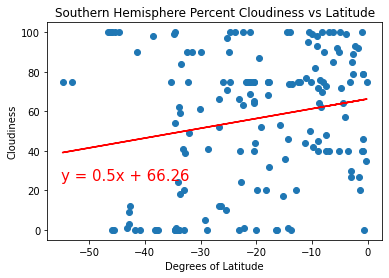

In [71]:
x_values = south["Latitude"]
y_values = south["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere Percent Cloudiness vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.007951485764976328


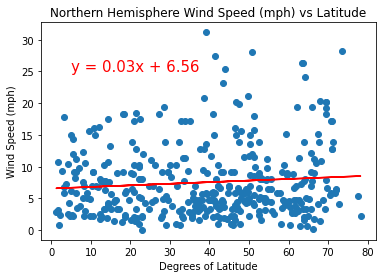

In [76]:
x_values = north["Latitude"]
y_values = north["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,25),fontsize=15,color="red")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere Wind Speed (mph) vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.013530155506540352


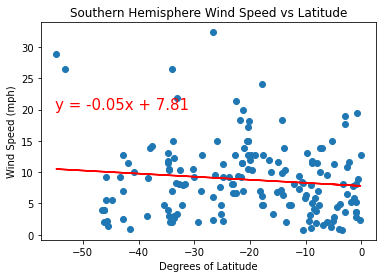

In [73]:
x_values = south["Latitude"]
y_values = south["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel("Degrees of Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere Wind Speed vs Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()